# Import Packages

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Loading Data

In [30]:
df=pd.read_csv('/kaggle/input/stroke-risk-prediction-dataset/stroke_risk_dataset.csv')
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


Pada tahap awal, dataset dibaca menggunakan fungsi pd.read_csv() dari library Pandas, yang bertujuan untuk memuat file CSV bernama stroke_risk_dataset.csv dari direktori yang telah ditentukan. Dataset yang berhasil dimuat kemudian disimpan dalam sebuah objek DataFrame bernama df. Setelah itu, fungsi df.head() digunakan untuk menampilkan lima baris pertama dari dataset, guna memberikan gambaran awal mengenai struktur data, seperti nama kolom, jenis data, serta nilai-nilai awal pada setiap fitur. Tahapan ini penting sebagai langkah awal eksplorasi data sebelum dilakukan proses pembersihan, transformasi, dan analisis lebih lanjut.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

Perintah df.info() digunakan untuk melihat ringkasan struktur dataset, seperti jumlah entri, jumlah kolom, nama kolom, tipe data, dan jumlah nilai non-null.

In [32]:
features=df.columns
features

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

features = df.columns menyimpan daftar nama semua kolom (fitur) dalam variabel features.

# Exploratory Data Analysis (EDA)

In [33]:
df.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


df.describe() memberikan statistik deskriptif seperti mean, std, dan quartiles untuk kolom numerik.

In [34]:
df.isnull().sum()

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64

df.isnull().sum() digunakan untuk mengecek jumlah nilai yang hilang (missing) di setiap kolom. Pada tahapan ini tidak ditemukan data hilang.

In [35]:
df.duplicated().sum()

1021

df.duplicated().sum() menghitung jumlah baris duplikat. Pada perintah ini ditemukan terdapat 1021 data yang terduplikasi

In [36]:
df.drop_duplicates(inplace=True)

df.drop_duplicates(inplace=True) digunakan untuk menghapus baris duplikat tersebut dari dataset secara permanen.

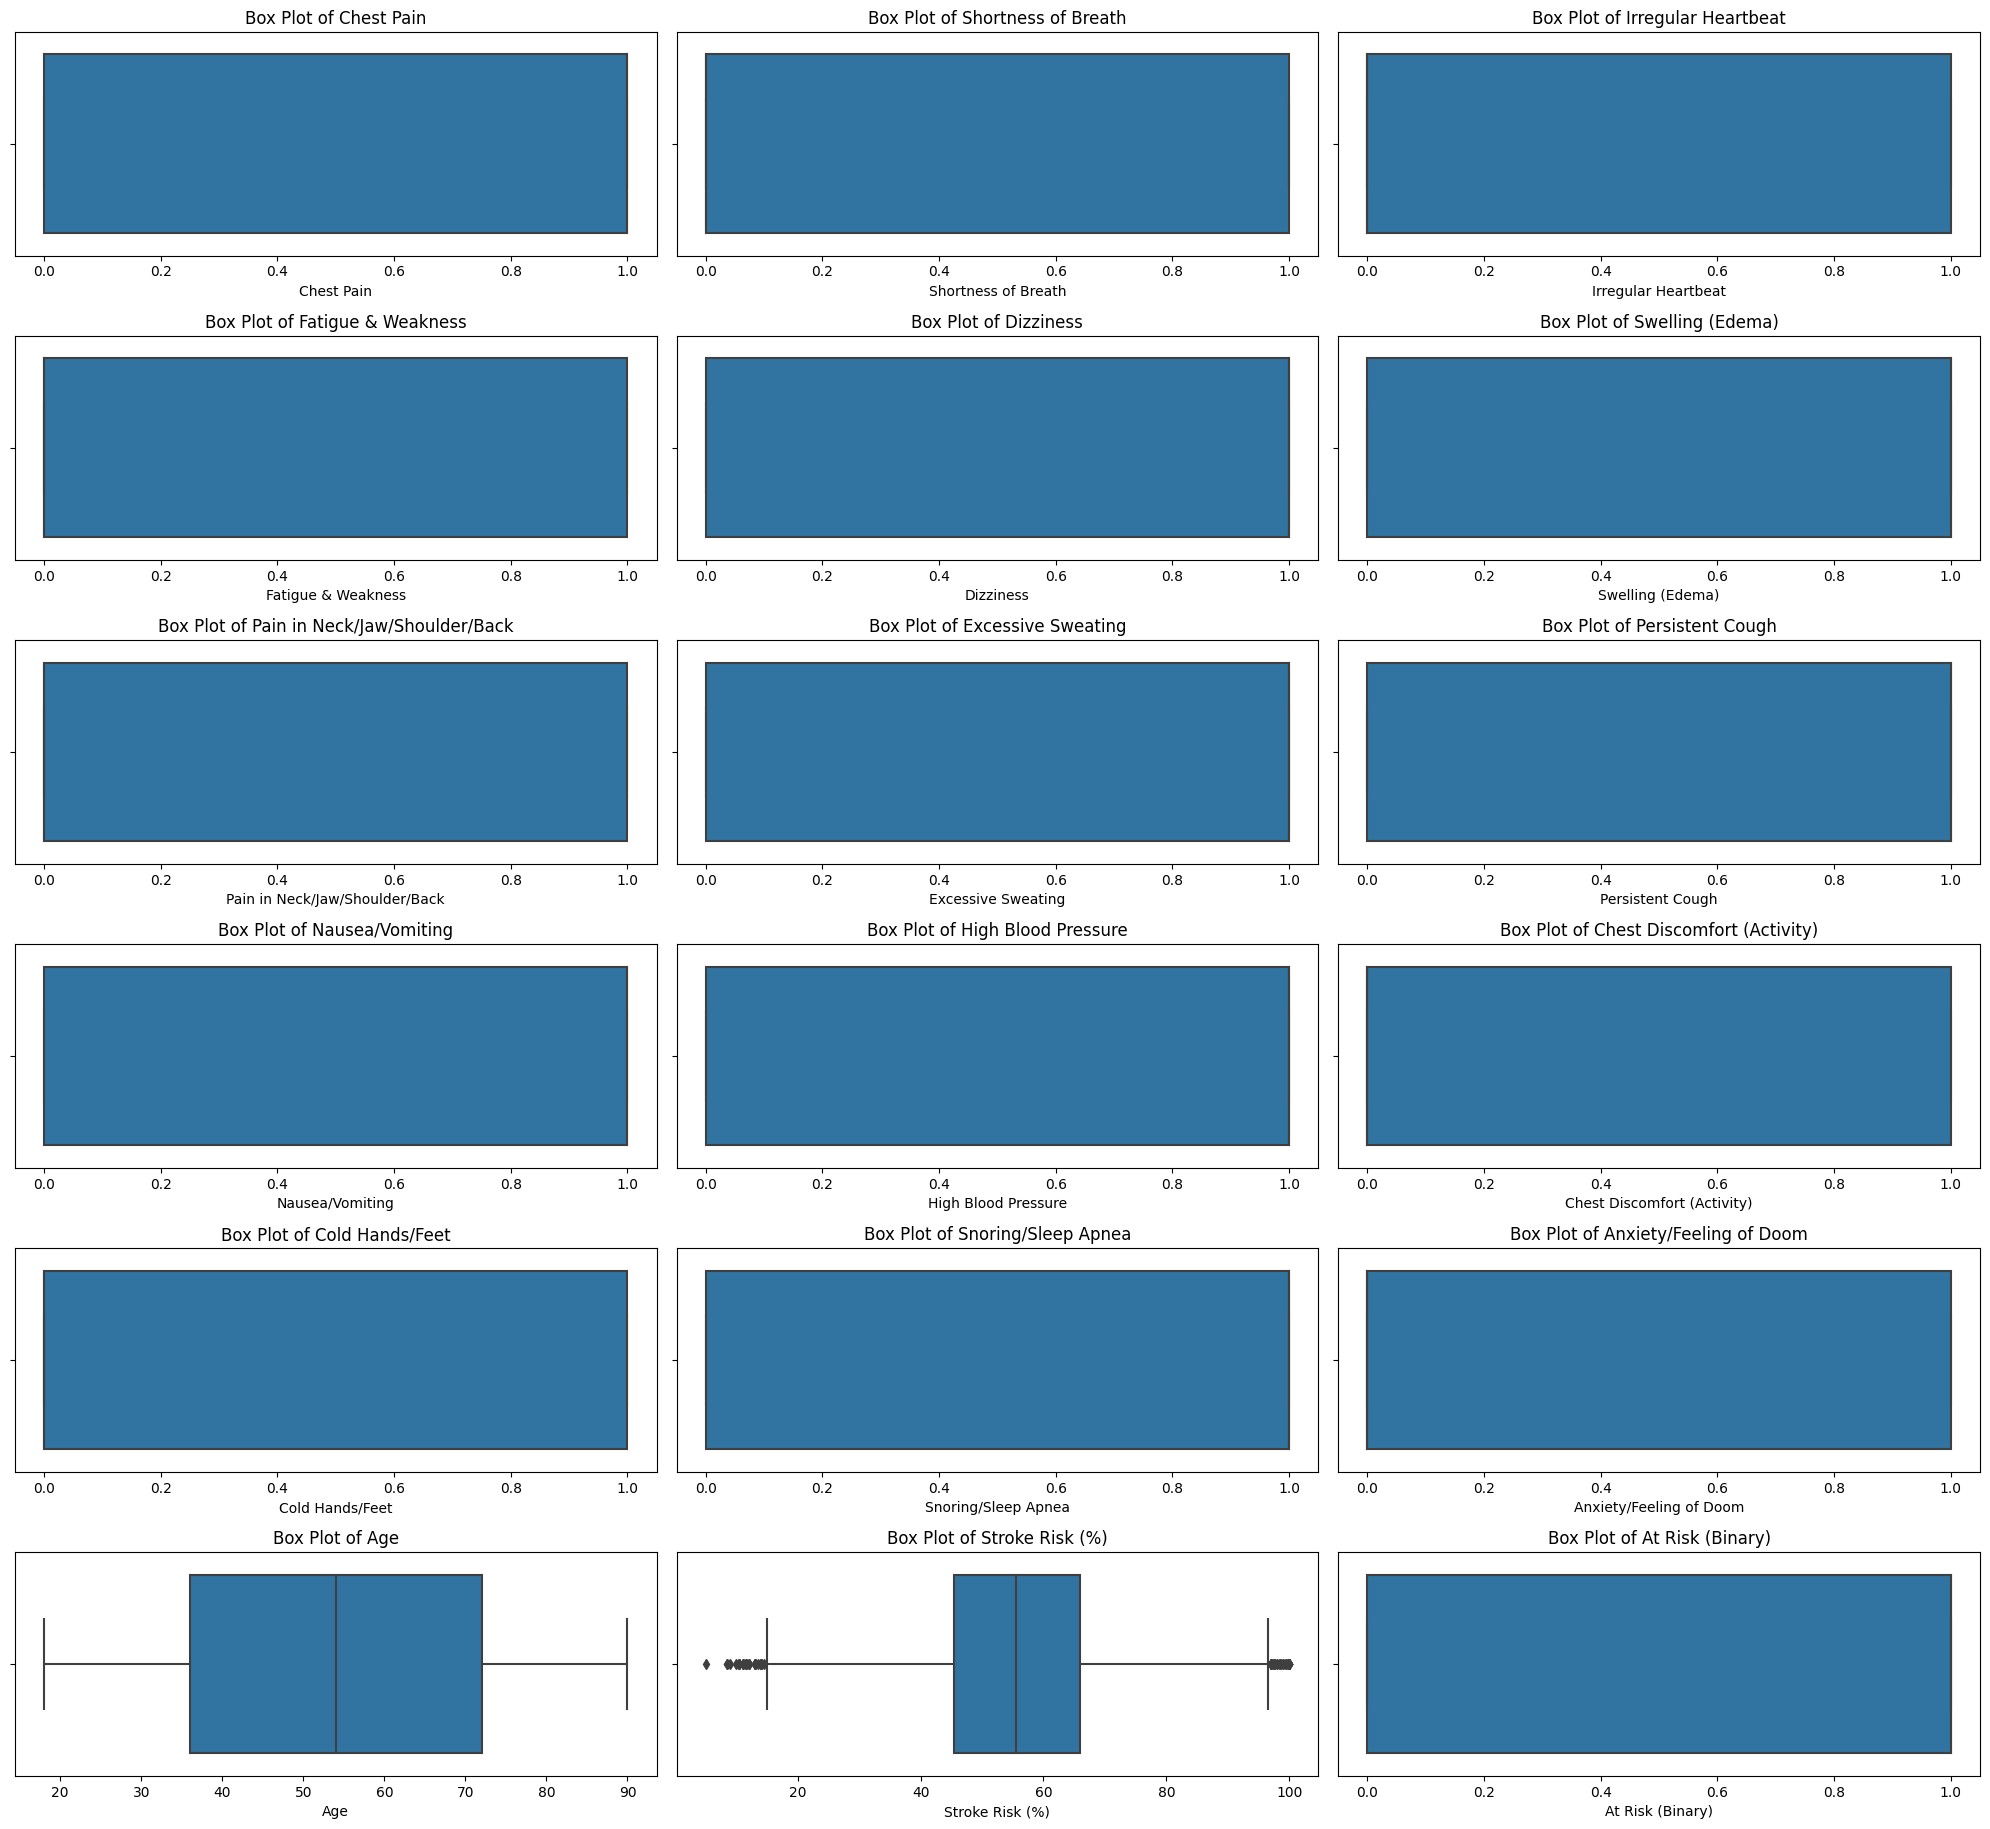

In [37]:
n_cols=3
n_rows=-(-(len(df.columns)//n_cols))+1

fig,axes=plt.subplots(n_rows, n_cols, figsize=(20,3*n_rows))

axes=axes.flatten()

for idx, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {feature}')

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

Kode ini berfungsi untuk membuat visualisasi boxplot dari setiap fitur (kolom) di dataset secara rapi dalam beberapa baris dan kolom pada satu figure besar. Ini membantu melihat distribusi dan deteksi outlier tiap fitur secara visual.

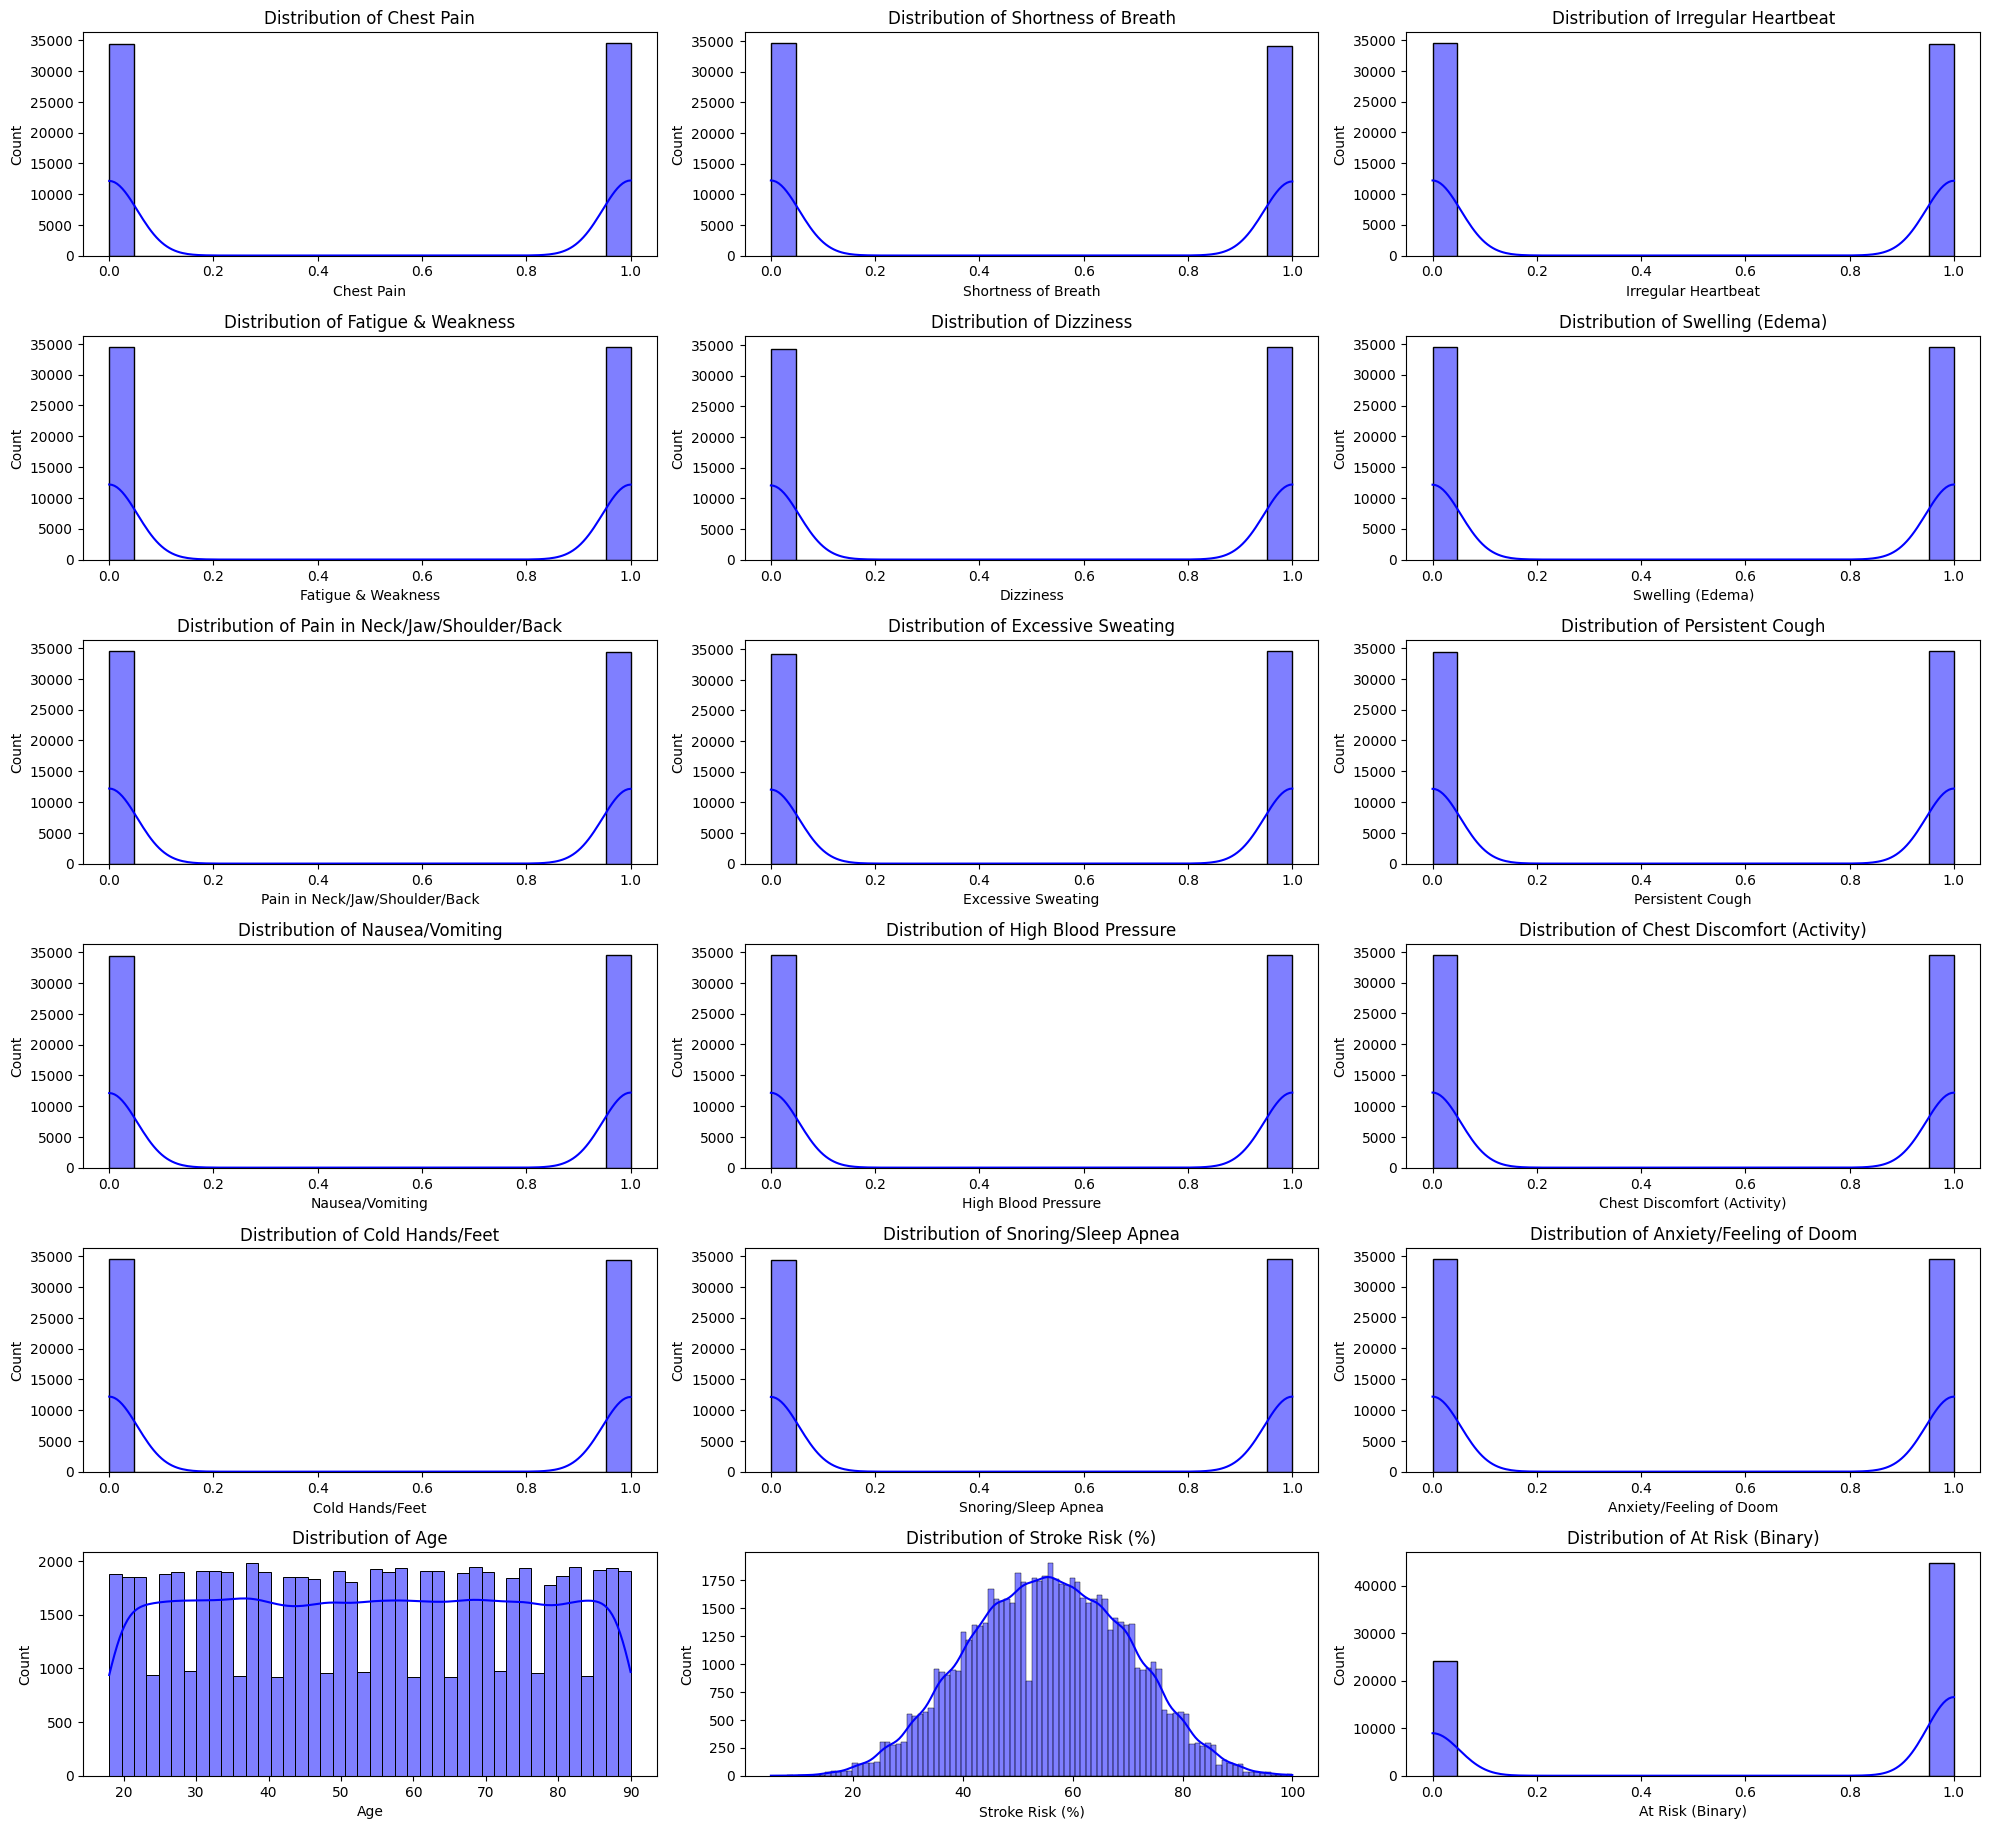

In [38]:
n_cols=3
n_rows=-(-(len(df.columns)//n_cols))+1

fig,axes=plt.subplots(n_rows, n_cols, figsize=(20,3*n_rows))

axes=axes.flatten()

for idx, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[idx], color='blue')
    axes[idx].set_title(f'Distribution of {feature}')

for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()
    

Kode ini membuat visualisasi distribusi tiap fitur dalam dataset menggunakan histogram dengan kurva KDE (Kernel Density Estimate) secara rapi dalam grid subplot. Visualisasi ini membantu memahami bentuk distribusi data setiap kolom, seperti simetri, skewness, dan keberadaan multimodalitas.

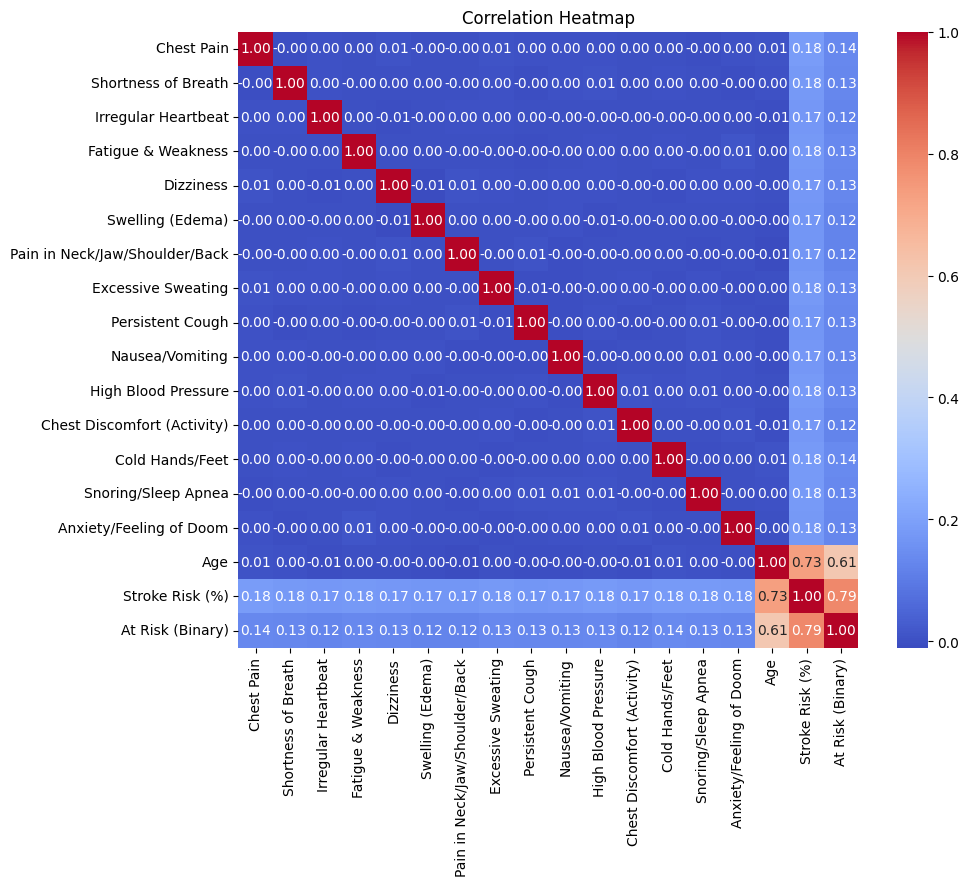

In [39]:
correlation_matrix=df[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Kode tersebut membuat visualisasi heatmap korelasi antar fitur dalam dataset. Heatmap ini berguna untuk melihat hubungan linear antar fitur, misalnya fitur mana yang berkorelasi kuat positif atau negatif, sehingga bisa membantu memilih fitur yang penting atau menghindari multikolinearitas.

# Building Models

In [40]:
X=df.drop(columns=['Stroke Risk (%)', 'At Risk (Binary)'])
y=df['At Risk (Binary)']

Kode ini melakukan pemisahan dataset menjadi fitur dan target untuk keperluan modeling.

In [42]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Kode ini melakukan normalisasi fitur dengan menggunakan StandardScaler dari scikit-learn. Tujuannya supaya fitur-fitur pada dataset memiliki skala yang sama agar model machine learning bisa belajar lebih efektif dan hasilnya lebih stabil.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training set shape: X_train={X_train.shape}, y_train={y_train.shape}')
print(f'Test set shape: X_test={X_test.shape}, y_test={y_test.shape}')

Training set shape: X_train=(55183, 16), y_train=(55183,)
Test set shape: X_test=(13796, 16), y_test=(13796,)


Kode tersebut melakukan pembagian data menjadi data latih dan data uji menggunakan fungsi train_test_split dari scikit-learn. Ini merupakan langkah penting agar model dapat dilatih dan dievaluasi secara adil.

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression:", grid_lr.best_params_)
y_pred_lr = grid_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Best Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4783
           1       1.00      1.00      1.00      9013

    accuracy                           1.00     13796
   macro avg       1.00      1.00      1.00     13796
weighted avg       1.00      1.00      1.00     13796



Kode ini melakukan pencarian hyperparameter terbaik untuk model Logistic Regression menggunakan GridSearchCV dengan validasi silang 5-fold, kemudian melatih model tersebut pada data latih, memprediksi data uji, dan menampilkan laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, dan f1-score untuk menilai performa model dalam memprediksi risiko stroke.

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Best Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4783
           1       0.95      0.97      0.96      9013

    accuracy                           0.95     13796
   macro avg       0.95      0.94      0.94     13796
weighted avg       0.95      0.95      0.95     13796



Kode ini melakukan pencarian hyperparameter terbaik untuk model Random Forest menggunakan GridSearchCV dengan validasi silang 5-fold. Parameter yang diuji meliputi jumlah pohon keputusan (n_estimators), kedalaman maksimum pohon (max_depth), jumlah minimum sampel untuk membagi node (min_samples_split), dan jumlah minimum sampel di daun (min_samples_leaf). Setelah menemukan kombinasi terbaik, model dilatih pada data latih, kemudian digunakan untuk memprediksi data uji, dan hasilnya dievaluasi dengan laporan klasifikasi yang menampilkan metrik seperti precision, recall, dan f1-score untuk menilai performa model dalam memprediksi risiko stroke.

In [51]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                        param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best XGBoost:", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

Best XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4783
           1       1.00      1.00      1.00      9013

    accuracy                           1.00     13796
   macro avg       1.00      1.00      1.00     13796
weighted avg       1.00      1.00      1.00     13796



Kode ini melakukan tuning hyperparameter untuk model XGBoost Classifier menggunakan GridSearchCV dengan validasi silang 5-fold. Parameter yang diuji adalah jumlah estimator (n_estimators), kedalaman maksimum pohon (max_depth), learning rate, dan subsample. Setelah menemukan kombinasi parameter terbaik, model dilatih dengan data latih, kemudian memprediksi data uji, dan performanya dievaluasi menggunakan classification report yang mencakup metrik seperti precision, recall, dan f1-score untuk mengukur akurasi prediksi risiko stroke.